## Bradley-Terry model tests

On va d'abord tenter de produire des données factices: on associe à chaque joueur sa force

In [31]:
import numpy as np

X = 1 / (1 + np.exp(-np.random.normal(0, 2, size=10)))

X.sort()

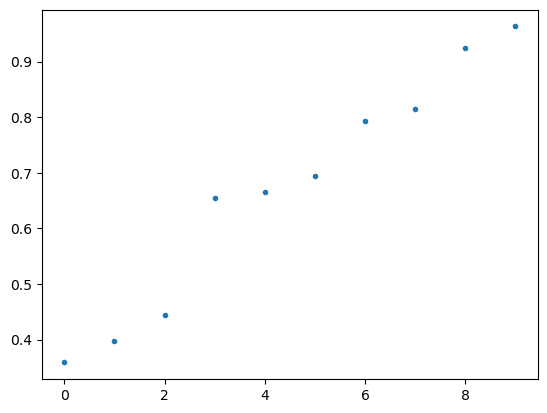

In [32]:
import matplotlib.pyplot as plt

plt.plot(X,'.')
plt.show()

In [34]:
def BT_proba(Vi,Vj):
    return Vi/(Vi+Vj)

def BT_score(i,X):
    Vi = X[i]
    Score = 0
    for j in range(len(X)):
        if i != j:
            Vj = X[j]
            proba = BT_proba(Vi,Vj)
            Score += np.random.binomial(1,proba)
    return Score

def BT_tournament(X):
    Scores = []
    for i in range(len(X)):
        Scores.append(BT_score(i,X))
    winner = Scores.index(max(Scores))
    return Scores, winner


In [35]:
print(BT_score(0,X))
print(BT_tournament(X))

3
([2, 3, 5, 4, 5, 2, 3, 5, 4, 6], 9)
